In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# IMPORTANDO DADOS

In [12]:
df = pd.read_csv('DataBase.csv')
df.head()

,time,input
0,110.062839,4034.0
1,110.141765,4045.0
2,110.221532,4059.0
3,110.301835,4044.0
4,110.382143,4043.0


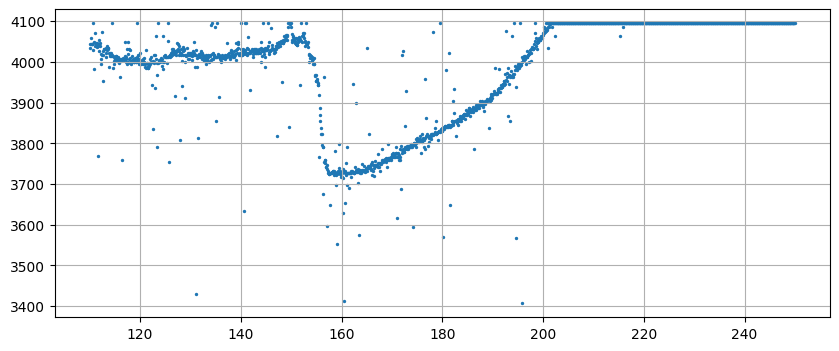

In [13]:
plt.figure(figsize=(10, 4))
plt.scatter(df.time, df.input, s=2)
plt.grid()

# NORMALIZANDO DADOS

In [14]:
def normalizeTable(df, key, dt=0.15):
    df[key]  = df[key] - df[key][0] # INICIA NO TEMPO 0
    initTime = df[key].iloc[0]
    finalTime = df[key].iloc[-1] + dt
    newAxis = np.arange(initTime, finalTime, dt)
    df = df.set_index(key).reindex(newAxis, method='ffill')
    return df.reset_index().rename(columns={'index': key})

dt = 0.100
df = normalizeTable(df, 'time', dt)
df

,time,input
0,0.0,4034.0
1,0.1,4045.0
2,0.2,4059.0
3,0.3,4044.0
4,0.4,4043.0
...,...,...
1395,139.5,4095.0
1396,139.6,4095.0
1397,139.7,4095.0
1398,139.8,4095.0


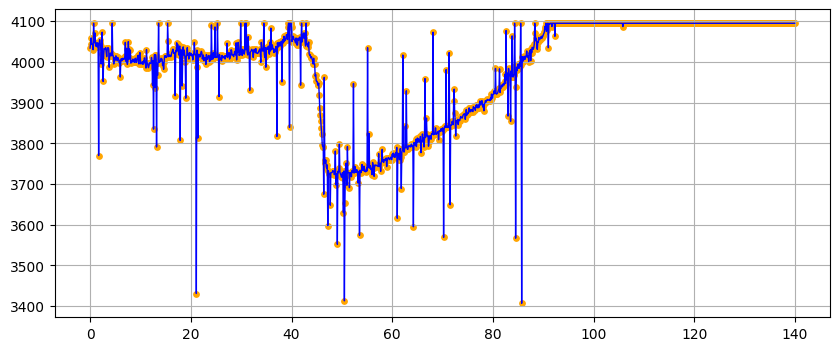

In [15]:
xData, yData = df.time.values, df.input.values

plt.figure(figsize=(10, 4))
plt.scatter(xData, yData, s=15, color='orange')
plt.plot(xData, yData, linewidth=1, color='blue')
plt.grid()

# FILTRO PERFEITO
**DOMÍNIO DA FREQUÊNCIA** $\Rightarrow$ Fazendo a transformada de Fourier para obter os dados no domínio da frequência, onde o eixo horizontal indica a frequência e o eixo vertical indica a amplitude, geralmente as amplitudes maiores são os alvos desejados, perto de frequências baixas

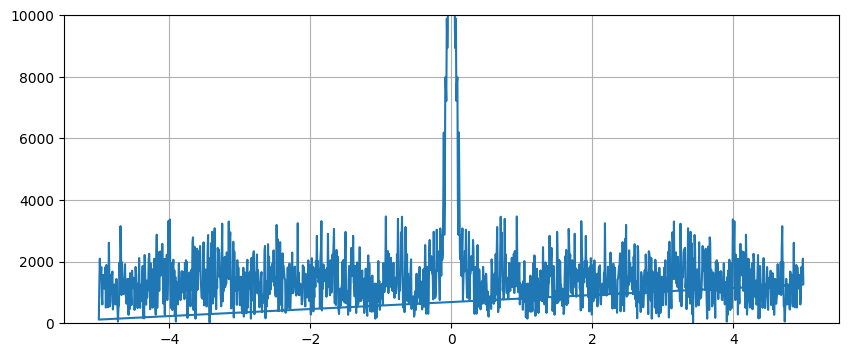

In [16]:
magnitude = np.fft.fft(yData)
frequency = np.fft.fftfreq(len(yData), dt)

plt.figure(figsize=(10, 4))
plt.plot(frequency, np.abs(magnitude))
plt.ylim(0, 10000)
plt.grid()

**FILTRO PASSA BAIXA** $\Rightarrow$ O gráfico acima apresenta enorme ruído depois da frequência principal do sistema, o objetivo é eliminar o ruído e impedir com que essas frequências sejam interpretadas

- Isso é feito escolhendo uma frequência de corte, em que tudo que está acima dessa frequência é bloqueada

In [17]:
f_c = 0.1

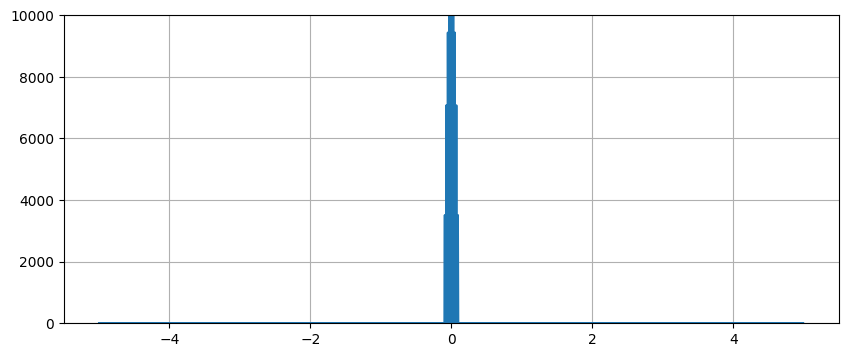

In [18]:
def applyLowBand(frequencyArray, magnitudeArray, upperLimit):
    allowed = np.abs(frequencyArray) <= upperLimit
    magnitudeArray[~allowed] = 0
    return magnitudeArray

magnitude = applyLowBand(frequency, magnitude, f_c)
plt.figure(figsize=(10, 4))
plt.plot(frequency, magnitude.real)
plt.ylim(0, 10000)
plt.grid()

- Voltando para o domínio do tempo

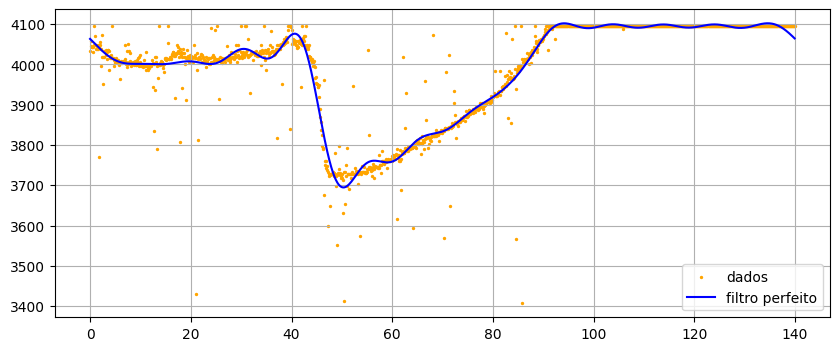

In [19]:
yModel = np.fft.ifft(magnitude).real

plt.figure(figsize=(10, 4))
plt.scatter(df.time, df.input, s=2, color='orange', label='dados')
plt.plot(xData, yModel, color='blue', label='filtro perfeito')
plt.legend(), plt.grid()
plt.show()

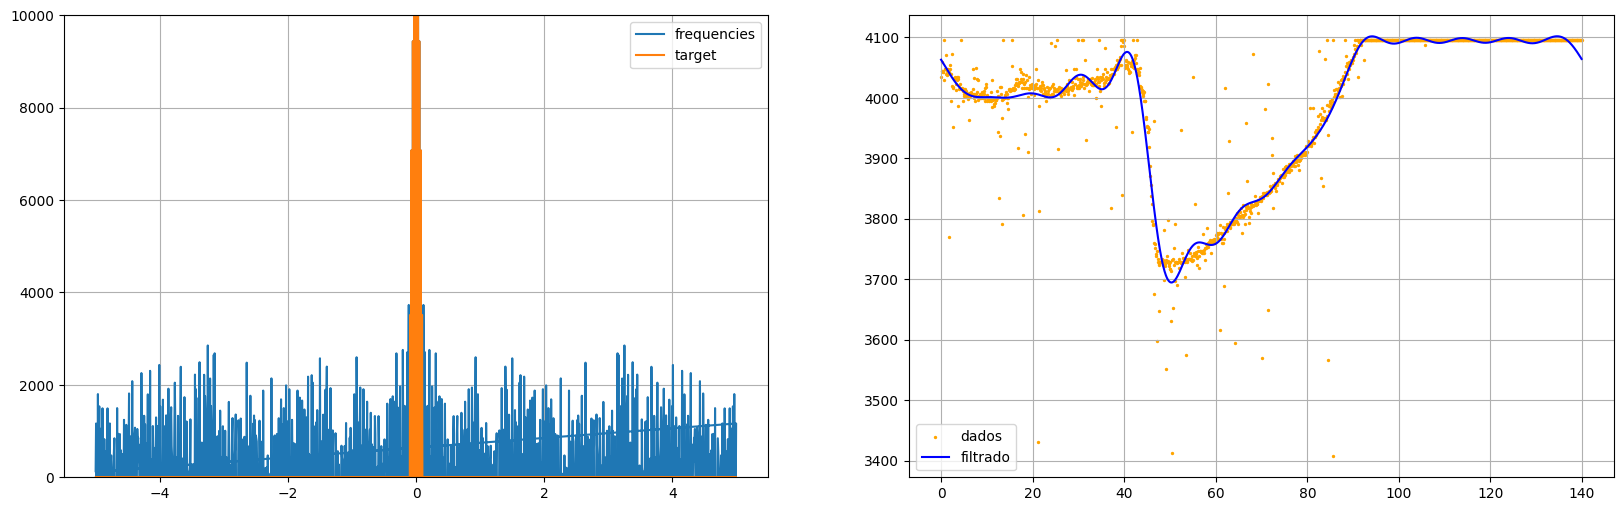

In [20]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)

plt.plot(np.fft.fftfreq(len(yData), dt), np.fft.fft(yData).real, label='frequencies')
plt.plot(frequency, magnitude.real, label='target')
plt.ylim(0, 10000)
plt.grid(), plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df.time, df.input, s=2, color='orange', label='dados')
plt.plot(xData, yModel, color='blue', label='filtrado')
plt.legend(), plt.grid()
plt.show()